In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing# Get column names first
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Importing CSV

In [2]:
xtrain = pd.read_csv('x_train.csv')
xtest = pd.read_csv('x_test.csv')
xtest1 = pd.read_csv('x_test.csv')

ytrain = pd.read_csv('y_train.csv')
print(xtrain.columns)


Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')


In [3]:
xtrain.head()

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1.000000,0,V,NOT,1,O,1,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,1,3877,2014,1.000000,0,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,2,4942,2013,1.000000,1,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,3,13428,2013,0.246575,0,NOT,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,4,17137,2015,1.000000,0,V,NOT,2,O,1,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340


Total Data

In [4]:
xtrain.drop('Index', axis = 1, inplace = True)
print("Total size of train data:",xtrain.shape[0])
print("Total size of test data:",xtest.shape[0])
print("Total size of dataset:",xtrain.shape[0]+xtest.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


In [5]:
train = pd.merge(left = xtrain, right = ytrain, how = 'left')
backUpTrain = train
train.drop('Index', axis = 1, inplace = True)
print(train.describe())
train.head()

              login    ft_2_categ          EXPO    ft_4_categ   ft_19_categ  \
count  10229.000000  10229.000000  10229.000000  10229.000000  10229.000000   
mean    9969.220745   2013.646789      0.913672      0.281064      1.938508   
std     5619.328018      1.380660      0.233806      0.449540      0.240242   
min        0.000000   2012.000000      0.000000      0.000000      1.000000   
25%     5198.000000   2012.000000      1.000000      0.000000      2.000000   
50%     9820.000000   2013.000000      1.000000      0.000000      2.000000   
75%    14922.000000   2015.000000      1.000000      1.000000      2.000000   
max    19995.000000   2016.000000      1.000000      1.000000      2.000000   

        superficief   ft_21_categ  ft_22_categ        TARGET  
count  10110.000000  10229.000000  8993.000000  10229.000000  
mean    1818.152918      2.238049  1965.061715      0.227002  
std     2272.111284      0.961589    33.548619      0.418914  
min        1.000000      1.000000  1

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0


Drop Duplicates

In [6]:
train.drop_duplicates()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [7]:
nullData = train.isnull().sum()
nullData

login             0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
TARGET            0
dtype: int64

In [8]:
print(train['ft_2_categ'].describe())

count    10229.000000
mean      2013.646789
std          1.380660
min       2012.000000
25%       2012.000000
50%       2013.000000
75%       2015.000000
max       2016.000000
Name: ft_2_categ, dtype: float64


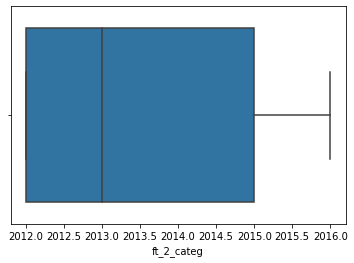

In [9]:
sns.boxplot(x = xtrain['ft_2_categ'])

In [10]:
train['EXPO'].describe()

count    10229.000000
mean         0.913672
std          0.233806
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: EXPO, dtype: float64

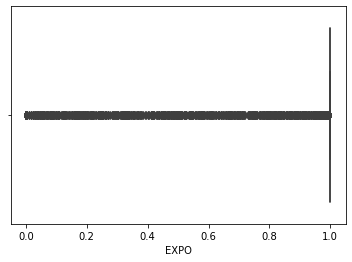

In [11]:
sns.boxplot(x = xtrain['EXPO'])

In [12]:
#train.drop(['login'], axis = 1)
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [13]:
train['ft_2_categ'].describe()

count    10229.000000
mean      2013.646789
std          1.380660
min       2012.000000
25%       2012.000000
50%       2013.000000
75%       2015.000000
max       2016.000000
Name: ft_2_categ, dtype: float64

In [14]:
train['Difference'] = train['ft_2_categ'] - train['ft_22_categ']
train['Difference'].describe()
train['Difference'].where(train['Difference'] < 0)
nullData = train.isnull().sum()
nullData

login             0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
TARGET            0
Difference     1236
dtype: int64

In [15]:
train = train[train.EXPO != 0]
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,base,2,550.0,2,1960.0,0,0,76217,0,52.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,base,2,1754.0,3,1960.0,0,0,64445,0,55.0


In [16]:
(train.Difference == 0).sum()
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,base,2,550.0,2,1960.0,0,0,76217,0,52.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,base,2,1754.0,3,1960.0,0,0,64445,0,55.0


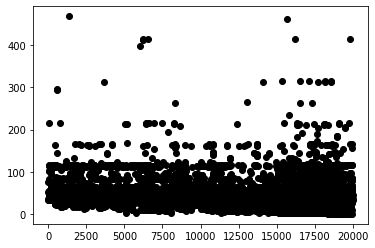

In [17]:
plt.plot(train['login'], train['Difference'], 'o', color='black');


In [18]:
train.drop(['login'], axis = 1)

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,2014,1.000000,0,V,NOT,1,O,1,O,NOT,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,2014,1.000000,0,V,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,2013,1.000000,1,V,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,2013,0.246575,0,NOT,V,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,2015,1.000000,0,V,NOT,2,O,1,O,NOT,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,2016,0.997268,0,V,N,1,O,1,O,N,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10224,2012,1.000000,0,V,V,V,V,V,V,V,...,base,2,550.0,2,1960.0,0,0,76217,0,52.0
10226,2015,0.246575,0,V,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN
10227,2015,1.000000,0,N,V,V,V,V,V,V,...,base,2,1754.0,3,1960.0,0,0,64445,0,55.0


In [19]:
train['ft_22_categ'].describe()

count    8907.000000
mean     1965.063995
std        33.565923
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [20]:
backUp1 = train
train[(train.ft_22_categ == 2000)]
count = train['ft_22_categ'].value_counts()
print(count.describe())
print(count)

count     139.000000
mean       64.079137
std       273.660110
min         1.000000
25%         2.000000
50%        10.000000
75%        28.500000
max      2616.000000
Name: ft_22_categ, dtype: float64
1960.0    2616
1980.0    1694
1988.0     790
1900.0     426
1970.0     336
          ... 
1923.0       1
1939.0       1
1854.0       1
1946.0       1
1550.0       1
Name: ft_22_categ, Length: 139, dtype: int64


In [21]:
count = pd.DataFrame(count) 
#count.describe()
(count[count['ft_22_categ'] > 28])
#train = train[train.ft_22_categ != 1960]
#train = train[train.ft_22_categ != 1980]
#train = train[train.ft_22_categ != 1988]
#train = train[train.ft_22_categ != 1900]
#train = train[train.ft_22_categ != 1970]
#train = train[train.ft_22_categ != 1950]
#train = train[train.ft_22_categ != 1930]
#train = train[train.ft_22_categ != 1920]
#train = train[train.ft_22_categ != 1990]
#train = train[train.ft_22_categ != 1960]
#train = train[train.ft_22_categ != 1975]
#train = train[train.ft_22_categ != 1940]
#train = train[train.ft_22_categ != 1965]
#train = train[train.ft_22_categ != 1850]
#train = train[train.ft_22_categ != 1910]
temp = train[train.ft_22_categ == 1960]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [22]:
temp = train[train.ft_22_categ == 1980]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [23]:
temp = train[train.ft_22_categ == 1988]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [24]:
temp = train[train.ft_22_categ == 1990]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [25]:
temp = train[train.ft_22_categ == 1900]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [26]:
temp = train[train.ft_22_categ == 1970]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [27]:
temp = train[train.ft_22_categ == 1950]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [28]:
temp = train[train.ft_22_categ == 1930]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [29]:
temp = train[train.ft_22_categ == 1920]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [30]:
temp = train[train.ft_22_categ == 1960]
temp = temp[temp.TARGET == 0]
for i in temp.login:
    train = train[train.login != i]

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


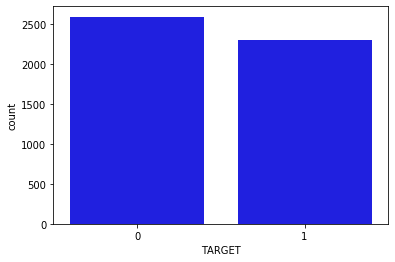

In [31]:
sns.countplot(x="TARGET",data=train,color="b")


In [32]:
train['ft_22_categ'].describe()

count    3761.000000
mean     1967.770540
std        44.340591
min      1545.000000
25%      1960.000000
50%      1978.000000
75%      1995.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [33]:
train['superficief'].describe()

count     4814.000000
mean      2329.679892
std       2724.987482
min         15.000000
25%        650.000000
50%       1388.000000
75%       3000.000000
max      30745.000000
Name: superficief, dtype: float64

In [34]:
train['superficief']=train['superficief'].interpolate(method='linear',limit_direction='forward')

In [35]:
train['ft_22_categ']=train['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [36]:
train['superficief'].describe()

count     4885.000000
mean      2332.146571
std       2718.987082
min         15.000000
25%        650.000000
50%       1390.000000
75%       3000.000000
max      30745.000000
Name: superficief, dtype: float64

In [37]:
train['ft_22_categ'].describe()

count    4885.000000
mean     1967.745036
std        41.950807
min      1545.000000
25%      1960.000000
50%      1976.000000
75%      1991.500000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [38]:
train['ft_5_categ'].describe()

count     4885
unique       4
top          V
freq      3684
Name: ft_5_categ, dtype: object

In [39]:
train_ce = train.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['ft_5_categ'])
df_binary = encoder.fit_transform(train_ce)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ', 'ft_7_categ',
       'ft_8_categ', 'ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ',
       'ft_13_categ', 'ft_14_categ', 'ft_15_categ', 'ft_16_categ',
       'ft_17_categ', 'ft_18_categ', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee',
       'TARGET', 'Difference'],
      dtype='object')

In [40]:
encoder = ce.BinaryEncoder(cols=['ft_6_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee', 'TARGET', 'Difference'],
      dtype='object')

In [41]:
encoder = ce.BinaryEncoder(cols=['ft_7_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [42]:
encoder = ce.BinaryEncoder(cols=['ft_8_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [43]:
encoder = ce.BinaryEncoder(cols=['ft_9_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [44]:
encoder = ce.BinaryEncoder(cols=['ft_10_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [45]:
encoder = ce.BinaryEncoder(cols=['ft_11_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [46]:
encoder = ce.BinaryEncoder(cols=['ft_12_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [47]:
encoder = ce.BinaryEncoder(cols=['ft_13_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [48]:
encoder = ce.BinaryEncoder(cols=['ft_14_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [49]:
encoder = ce.BinaryEncoder(cols=['ft_15_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [50]:
encoder = ce.BinaryEncoder(cols=['ft_16_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_0', 'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee', 'TARGET',
       'Difference'],
      dtype='object')

In [51]:
encoder = ce.BinaryEncoder(cols=['ft_17_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,based,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,based,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,based,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,based,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,based,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,base,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,pi,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,effpi,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,base,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [52]:
encoder = ce.BinaryEncoder(cols=['ft_18_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary


,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,2,1351.0,4,2012.000000,0,2,65440,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,1,2,1972.0,2,1980.000000,0,0,14341,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,1,2,1630.0,4,1977.333333,0,0,75109,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,1,2,532.0,3,1974.666667,0,0,92004,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,2,1050.0,2,1972.000000,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,0,2,2178.0,1,1960.000000,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,1,2,625.0,4,1968.000000,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,0,2,2417.0,1,1993.000000,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,2,750.0,4,1981.500000,0,0,6029,0,NaN


In [53]:
df_binary['ft_23_categ'].replace(to_replace = 'V', value = '2.5')
df_binary['ft_23_categ'] = df_binary['ft_23_categ'].replace(to_replace = 'V', value = 0.8)
df_binary['ft_23_categ'].describe()
df_binary['ft_23_categ'].value_counts()

replace_map = {'ft_23_categ': {'0': 0, '0.3': 0.3, '0.6': 0.6, '0.8': 0.8,
                                  '1': 1, '2': 2, '1.5': 1.5}}

df_binary['ft_23_categ'].replace(replace_map, inplace=True)

print(df_binary['ft_23_categ'].value_counts())
df_binary['ft_23_categ'].describe()
#df_binary['ft_23_categ'].astype('float64').dtypes

0      3909
0.3     452
0.6     404
0.8      70
1        31
2        11
1.5       8
Name: ft_23_categ, dtype: int64


count     4885
unique       7
top          0
freq      3909
Name: ft_23_categ, dtype: object

In [54]:
df_binary_copy = df_binary.copy()
#df_binary['ft_23_categ'] = df_binary['ft_23_categ'].astype('float64').dtypes
#df_binary = df_binary_copy
df_binary.dtypes

login              int64
ft_2_categ         int64
EXPO             float64
ft_4_categ         int64
ft_5_categ_0       int64
ft_5_categ_1       int64
ft_5_categ_2       int64
ft_6_categ_0       int64
ft_6_categ_1       int64
ft_6_categ_2       int64
ft_7_categ_0       int64
ft_7_categ_1       int64
ft_7_categ_2       int64
ft_8_categ_0       int64
ft_8_categ_1       int64
ft_8_categ_2       int64
ft_9_categ_0       int64
ft_9_categ_1       int64
ft_9_categ_2       int64
ft_10_categ_0      int64
ft_10_categ_1      int64
ft_10_categ_2      int64
ft_11_categ_0      int64
ft_11_categ_1      int64
ft_11_categ_2      int64
ft_12_categ_0      int64
ft_12_categ_1      int64
ft_12_categ_2      int64
ft_13_categ_0      int64
ft_13_categ_1      int64
ft_13_categ_2      int64
ft_14_categ_0      int64
ft_14_categ_1      int64
ft_14_categ_2      int64
ft_15_categ_0      int64
ft_15_categ_1      int64
ft_15_categ_2      int64
ft_16_categ_0      int64
ft_16_categ_1      int64
ft_16_categ_2      int64


In [55]:
df_binary['ft_24_categ'].describe()
df_binary['ft_24_categ'].value_counts()
df_binary['ft_24_categ'] = df_binary['ft_24_categ'].replace(to_replace = '>=10', value = 10)
df_binary['ft_24_categ'] = df_binary['ft_24_categ'].replace(to_replace = '> = 10', value = 10)
df_binary['ft_24_categ'].describe()



count     4885
unique      11
top          0
freq      2123
Name: ft_24_categ, dtype: object

In [56]:
#df_binary = df_binary.convert_objects(convert_numeric=True)
df_binary = df_binary.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_binary['ft_23_categ'].describe()

count    4885.000000
mean        0.102149
std         0.236402
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [57]:
df_binary['ft_24_categ'].describe()

count    4885.000000
mean        2.515865
std         2.612812
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: ft_24_categ, dtype: float64

In [58]:
df_binary_copy = df_binary.copy()

In [59]:
df_binary['Difference'] = df_binary['ft_2_categ'] - df_binary['ft_22_categ']

In [60]:
nullData = df_binary.isnull().sum()
nullData

login              0
ft_2_categ         0
EXPO               0
ft_4_categ         0
ft_5_categ_0       0
ft_5_categ_1       0
ft_5_categ_2       0
ft_6_categ_0       0
ft_6_categ_1       0
ft_6_categ_2       0
ft_7_categ_0       0
ft_7_categ_1       0
ft_7_categ_2       0
ft_8_categ_0       0
ft_8_categ_1       0
ft_8_categ_2       0
ft_9_categ_0       0
ft_9_categ_1       0
ft_9_categ_2       0
ft_10_categ_0      0
ft_10_categ_1      0
ft_10_categ_2      0
ft_11_categ_0      0
ft_11_categ_1      0
ft_11_categ_2      0
ft_12_categ_0      0
ft_12_categ_1      0
ft_12_categ_2      0
ft_13_categ_0      0
ft_13_categ_1      0
ft_13_categ_2      0
ft_14_categ_0      0
ft_14_categ_1      0
ft_14_categ_2      0
ft_15_categ_0      0
ft_15_categ_1      0
ft_15_categ_2      0
ft_16_categ_0      0
ft_16_categ_1      0
ft_16_categ_2      0
ft_17_categ_0      0
ft_17_categ_1      0
ft_17_categ_2      0
ft_18_categ_0      0
ft_18_categ_1      0
ft_18_categ_2      0
ft_18_categ_3      0
ft_19_categ  

In [61]:
df_binary['ft_23_categ']=df_binary['ft_23_categ'].interpolate(method='linear',limit_direction='forward')
df_binary['ft_23_categ'].describe()

count    4885.000000
mean        0.102149
std         0.236402
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [62]:
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,2,1351.0,4,2012.000000,0.0,2,65440.0,0,2.000000
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,1,2,1972.0,2,1980.000000,0.0,0,14341.0,1,34.000000
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,1,2,1630.0,4,1977.333333,0.0,0,75109.0,0,35.666667
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,1,2,532.0,3,1974.666667,0.0,0,92004.0,0,38.333333
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,2,1050.0,2,1972.000000,0.0,4,59340.0,0,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,0,2,2178.0,1,1960.000000,0.0,4,36044.0,1,53.000000
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,1,2,625.0,4,1968.000000,0.6,3,6138.0,0,44.000000
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,0,2,2417.0,1,1993.000000,0.0,4,73094.0,0,23.000000
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,2,750.0,4,1981.500000,0.0,0,6029.0,0,33.500000


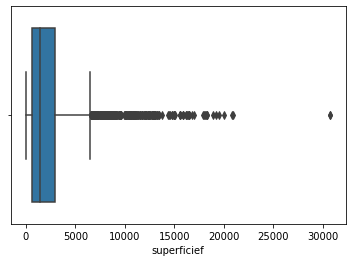

In [63]:
sns.boxplot(x = df_binary['superficief'])

In [64]:
df_binary[df_binary.superficief > 11000]


,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
70,15816,2013,1.000000,0,0,0,1,0,0,1,...,0,2,19195.0,2,1970.0,0.0,6,60057.0,1,43.0
127,18463,2014,1.000000,1,0,0,1,0,0,1,...,0,2,12582.0,3,1970.0,0.0,8,92023.0,1,44.0
317,12060,2014,1.000000,1,0,0,1,0,0,1,...,0,2,18270.0,4,1967.0,0.0,10,75113.0,1,47.0
342,15213,2016,0.997268,0,0,0,1,0,0,1,...,0,2,11760.0,3,1987.0,0.3,3,92063.0,0,29.0
385,12439,2014,1.000000,0,0,0,1,0,0,1,...,0,2,16250.0,1,1960.0,0.0,5,13056.0,1,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,16719,2014,1.000000,0,0,0,1,0,1,1,...,1,2,13030.0,2,1970.0,0.0,9,51454.0,1,44.0
9736,3257,2012,1.000000,0,0,0,1,0,1,0,...,0,2,13777.0,1,1980.0,0.0,0,86194.0,1,32.0
9810,10894,2012,1.000000,0,1,0,0,0,1,0,...,0,2,30745.0,2,1980.0,0.0,0,83009.0,1,32.0
9880,16931,2016,1.000000,0,0,0,1,0,1,1,...,1,2,12900.0,4,1970.0,0.0,5,6083.0,1,46.0


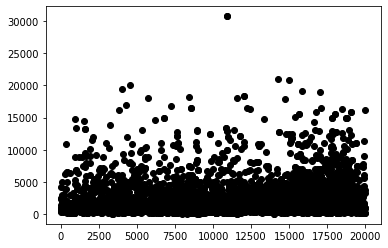

In [65]:
plt.plot(df_binary['login'], df_binary['superficief'], 'o', color='black');


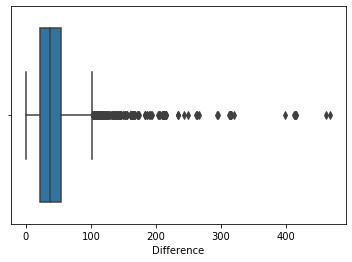

In [66]:
sns.boxplot(x = df_binary['Difference'])

In [67]:
df_binary_copy2 = df_binary.copy()
df_binary_copy2

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,2,1351.0,4,2012.000000,0.0,2,65440.0,0,2.000000
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,1,2,1972.0,2,1980.000000,0.0,0,14341.0,1,34.000000
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,1,2,1630.0,4,1977.333333,0.0,0,75109.0,0,35.666667
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,1,2,532.0,3,1974.666667,0.0,0,92004.0,0,38.333333
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,2,1050.0,2,1972.000000,0.0,4,59340.0,0,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,0,0,1,0,1,1,...,0,2,2178.0,1,1960.000000,0.0,4,36044.0,1,53.000000
10222,2526,2012,1.000000,0,0,0,1,0,1,1,...,1,2,625.0,4,1968.000000,0.6,3,6138.0,0,44.000000
10223,1605,2016,0.997268,0,0,0,1,0,1,1,...,0,2,2417.0,1,1993.000000,0.0,4,73094.0,0,23.000000
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,2,750.0,4,1981.500000,0.0,0,6029.0,0,33.500000


In [68]:
x = df_binary[df_binary.Difference > 110]
x[x.TARGET == 1]

#temp = train[train.ft_22_categ == 1960]
#temp = temp[temp.TARGET == 0]
#for i in x.login:
#    df_binary = df_binary[df_binary.login != i]

#df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
145,9008,2014,1.000000,0,0,0,1,0,0,1,...,0,2,2973.0,4,1850.0,0.0,6,75106.0,1,164.0
148,9799,2014,1.000000,0,0,0,1,0,0,1,...,1,2,318.0,4,1900.0,0.0,4,6004.0,1,114.0
188,18355,2012,0.751366,1,0,0,1,0,0,1,...,1,2,2205.0,3,1895.0,0.0,7,94067.0,1,117.0
286,3864,2015,1.000000,0,0,0,1,0,0,1,...,1,2,2450.0,3,1870.0,0.0,4,54395.0,1,145.0
305,7222,2015,1.000000,0,0,0,1,0,0,1,...,1,2,2100.0,2,1900.0,0.3,8,13207.0,1,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,4818,2012,1.000000,1,0,0,1,0,1,1,...,0,2,858.0,3,1900.0,0.0,4,92049.0,1,112.0
9928,13598,2013,1.000000,0,0,0,1,0,1,1,...,1,2,1800.0,3,1900.0,0.6,4,59163.0,1,113.0
10019,16578,2013,1.000000,1,0,0,1,0,1,1,...,1,1,741.0,2,1900.0,0.0,4,78551.0,1,113.0
10031,6331,2012,1.000000,0,0,0,1,0,1,1,...,1,2,436.0,2,1900.0,0.0,4,26362.0,1,112.0


In [69]:
backUp3 = df_binary

In [70]:
names = df_binary.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_binary)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df
df_binary = df_binary.drop(['login'], axis = 1)


In [71]:
df_binary = df_binary.drop(['Insee'], axis = 1)


In [72]:
tempdf = df_binary.copy()
#tempdf = tempdf.drop(['TARGET'], axis =1)
df_binary

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,TARGET,Difference
0,2014,1.000000,0,0,0,1,0,0,1,0,...,0,1,2,1351.0,4,2012.000000,0.0,2,0,2.000000
1,2014,1.000000,0,0,0,1,0,1,0,0,...,0,1,2,1972.0,2,1980.000000,0.0,0,1,34.000000
2,2013,1.000000,1,0,0,1,0,1,0,0,...,0,1,2,1630.0,4,1977.333333,0.0,0,0,35.666667
3,2013,0.246575,0,0,1,0,0,1,0,0,...,0,1,2,532.0,3,1974.666667,0.0,0,0,38.333333
4,2015,1.000000,0,0,0,1,0,0,1,0,...,0,1,2,1050.0,2,1972.000000,0.0,4,0,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,2013,1.000000,0,0,0,1,0,1,1,1,...,1,0,2,2178.0,1,1960.000000,0.0,4,1,53.000000
10222,2012,1.000000,0,0,0,1,0,1,1,0,...,1,1,2,625.0,4,1968.000000,0.6,3,0,44.000000
10223,2016,0.997268,0,0,0,1,0,1,1,0,...,0,0,2,2417.0,1,1993.000000,0.0,4,0,23.000000
10226,2015,0.246575,0,0,0,1,0,1,0,0,...,1,0,2,750.0,4,1981.500000,0.0,0,0,33.500000


In [73]:
names = df_binary.columns# Create the Scaler object
#names = np.array(names)
#names = np.delete(names,52)
names

scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_binary)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,TARGET,Difference
0,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.712651,1.610762,0.27221,-0.360887,1.671377,1.055033,-0.432144,-0.197457,-0.941329,-1.045728
1,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.132470,-0.317824,0.292157,-0.432144,-0.962994,1.062328,-0.284095
2,-0.492148,0.325953,1.464761,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.258265,1.671377,0.228584,-0.432144,-0.962994,-0.941329,-0.244426
3,-0.492148,-3.704661,-0.682705,-0.49872,4.519451,-1.770967,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.662133,0.676776,0.165011,-0.432144,-0.962994,-0.941329,-0.180957
4,0.952650,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.712651,1.610762,0.27221,-0.471601,-0.317824,0.101438,-0.432144,0.568080,-0.941329,-0.069885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-0.492148,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,4.324070,...,0.583890,-0.620824,0.27221,-0.056698,-1.312425,-0.184641,-0.432144,0.568080,1.062328,0.168125
4881,-1.214548,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,0.583890,1.610762,0.27221,-0.627926,1.671377,0.006078,2.106162,0.185312,-0.941329,-0.046084
4882,1.675049,0.311336,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,-1.712651,-0.620824,0.27221,0.031211,-1.312425,0.602075,-0.432144,0.568080,-0.941329,-0.545906
4883,0.952650,-3.704661,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,0.583890,-0.620824,0.27221,-0.581948,1.671377,0.327917,-0.432144,-0.962994,-0.941329,-0.295995


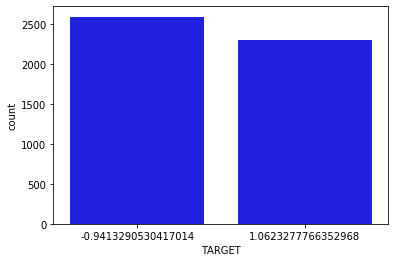

In [74]:
sns.countplot(x="TARGET",data=scaled_df,color="b")

In [75]:
scaled_df['TARGET'] = scaled_df['TARGET'].replace(to_replace = -0.9413290530417014, value = 0)
scaled_df['TARGET'] = scaled_df['TARGET'].replace(to_replace = 1.0623277766352968, value = 1)
#scaled_df['TARGET'] = scaled_df['TARGET'].astype('int64').dtypes
scaled_df['TARGET'] = scaled_df['TARGET'].astype('Int64')
scaled_df.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_0',
       'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0', 'ft_9_categ_1',
       'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1', 'ft_10_categ_2',
       'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'TARGET', 'Difference'],
      dtype='object')

In [76]:
scaled_df = scaled_df.reindex(columns=['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_0',
       'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0', 'ft_9_categ_1',
       'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1', 'ft_10_categ_2',
       'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference', 'TARGET'])

scaled_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference,TARGET
0,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.712651,1.610762,0.27221,-0.360887,1.671377,1.055033,-0.432144,-0.197457,-1.045728,0
1,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.132470,-0.317824,0.292157,-0.432144,-0.962994,-0.284095,1
2,-0.492148,0.325953,1.464761,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.258265,1.671377,0.228584,-0.432144,-0.962994,-0.244426,0
3,-0.492148,-3.704661,-0.682705,-0.49872,4.519451,-1.770967,-0.014309,0.339929,-1.140134,-0.231264,...,-1.712651,1.610762,0.27221,-0.662133,0.676776,0.165011,-0.432144,-0.962994,-0.180957,0
4,0.952650,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.712651,1.610762,0.27221,-0.471601,-0.317824,0.101438,-0.432144,0.568080,-0.069885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-0.492148,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,4.324070,...,0.583890,-0.620824,0.27221,-0.056698,-1.312425,-0.184641,-0.432144,0.568080,0.168125,1
4881,-1.214548,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,0.583890,1.610762,0.27221,-0.627926,1.671377,0.006078,2.106162,0.185312,-0.046084,0
4882,1.675049,0.311336,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,-1.712651,-0.620824,0.27221,0.031211,-1.312425,0.602075,-0.432144,0.568080,-0.545906,0
4883,0.952650,-3.704661,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,0.583890,-0.620824,0.27221,-0.581948,1.671377,0.327917,-0.432144,-0.962994,-0.295995,0


In [77]:
sdf = scaled_df.copy()
#sdf
sdf = sdf.drop(['TARGET'], axis = 1)
sdf
target = scaled_df['TARGET'].copy()
target

0       0
1       1
2       0
3       0
4       0
       ..
4880    1
4881    0
4882    0
4883    0
4884    1
Name: TARGET, Length: 4885, dtype: Int64

/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[8.92056262e-02 6.60179276e-02 3.41439214e-02 1.00594332e-03
 2.16290339e-03 2.88580722e-03 2.24976173e-05 8.61543712e-04
 2.76684857e-03 5.72088650e-03 2.09498028e-02 6.51698385e-03
 0.00000000e+00 2.91562743e-03 2.26477767e-04 0.00000000e+00
 5.34113326e-04 2.01774831e-04 2.92142637e-04 5.12915467e-04
 3.80235015e-03 1.10945964e-04 1.00618088e-03 1.49566218e-04
 3.25678332e-03 1.35748805e-02 2.41093851e-03 2.90103362e-03
 9.12314615e-03 2.53603027e-03 2.64691819e-03 5.19958649e-03
 2.70395629e-03 0.00000000e+00 1.52289983e-03 1.06689452e-04
 0.00000000e+00 1.28813109e-03 2.23956106e-04 4.42597965e-03
 2.12662363e-03 7.33112191e-03 0.00000000e+00 1.05520156e-02
 1.64728278e-02 9.94707438e-03 1.29232527e-02 2.28665537e-01
 6.92861832e-02 2.56860433e-01 3.16092990e-02 6.02919152e-02]


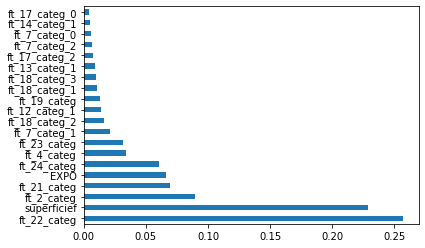

In [78]:
#data = pd.read_csv("D://Blogs//train.csv")
x1 = scaled_df.iloc[:,0:52]  #independent columns
y1 = scaled_df.iloc[:,-1]    #target column i.e price range
y1 = y1.astype('int64') 
model = ExtraTreesClassifier()
model.fit(x1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

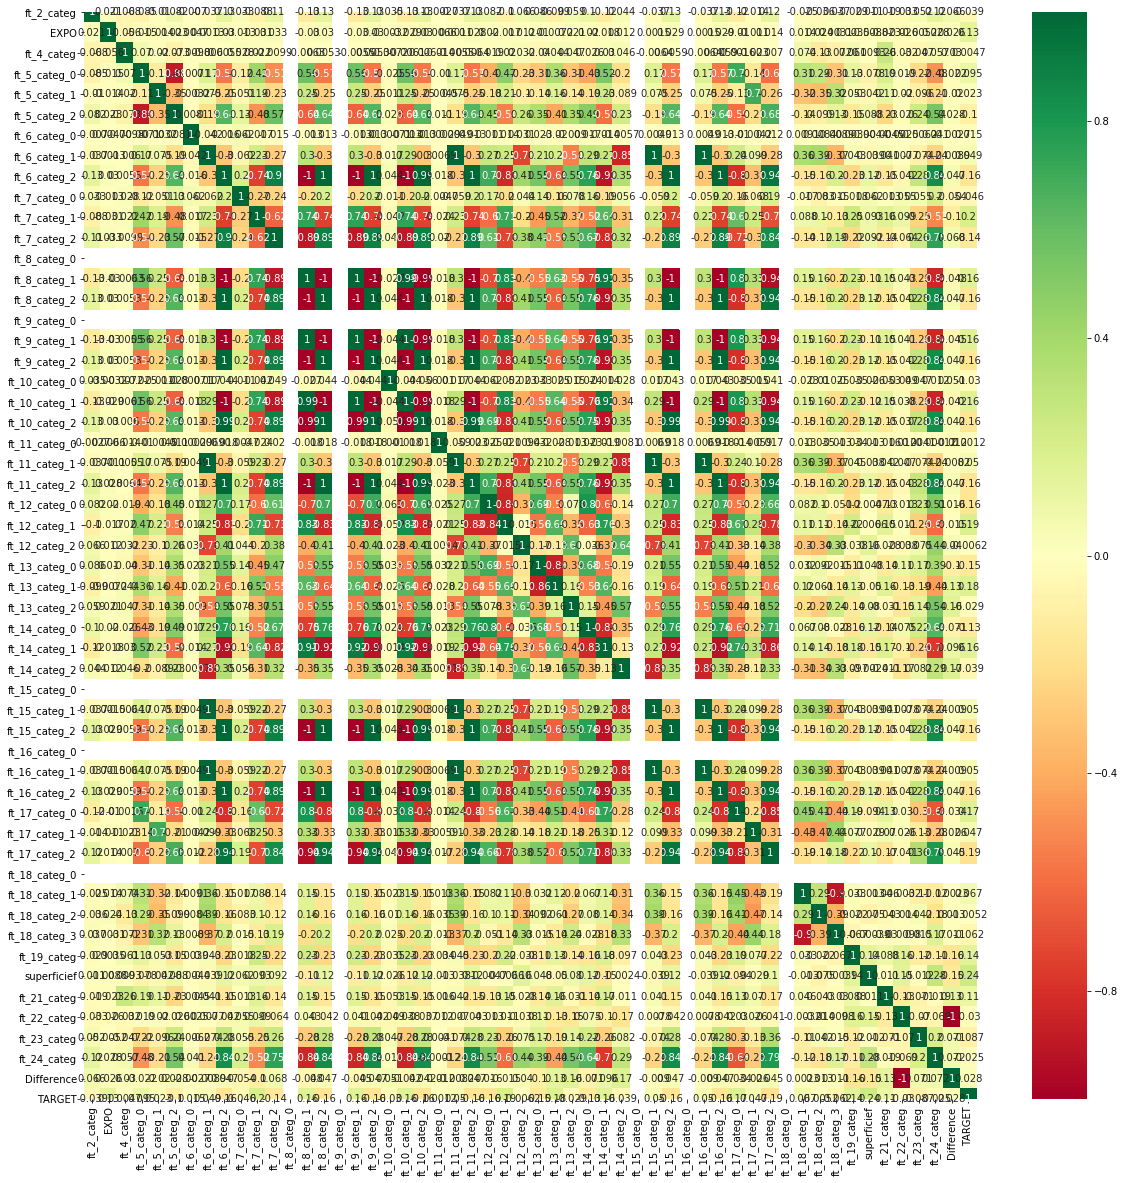

In [79]:
#data = pd.read_csv("D://Blogs//train.csv")
X = scaled_df.iloc[:,0:52]  #independent columns
y = scaled_df.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
y = y.astype('int64')

corrmat = scaled_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(scaled_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#print(g)

/home/prajj/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/prajj/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5179: FutureWarning: Series.base is deprecated and will be removed in a future version
  return object.__getattribute__(self, name)


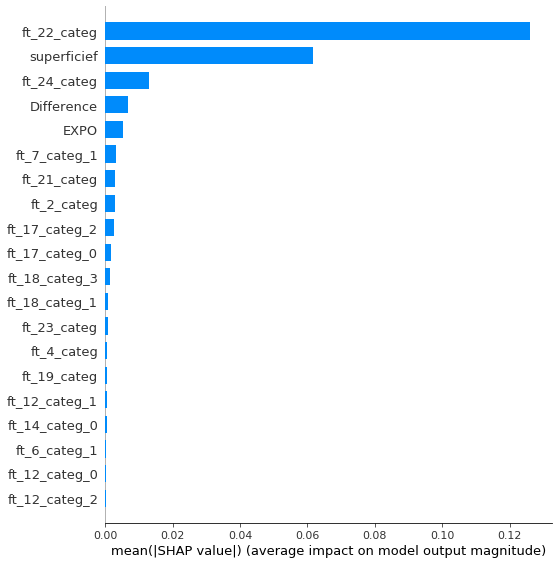

In [80]:
import xgboost
import shap # load JS visualization code to notebook
#shap.initjs()# train XGBoost model
X,y = sdf,target
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [81]:
sdf

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference
0,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.360887,1.671377,1.055033,-0.432144,-0.197457,-1.045728
1,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.132470,-0.317824,0.292157,-0.432144,-0.962994,-0.284095
2,-0.492148,0.325953,1.464761,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.258265,1.671377,0.228584,-0.432144,-0.962994,-0.244426
3,-0.492148,-3.704661,-0.682705,-0.49872,4.519451,-1.770967,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.662133,0.676776,0.165011,-0.432144,-0.962994,-0.180957
4,0.952650,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.471601,-0.317824,0.101438,-0.432144,0.568080,-0.069885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-0.492148,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,4.324070,...,0.633181,0.583890,-0.620824,0.27221,-0.056698,-1.312425,-0.184641,-0.432144,0.568080,0.168125
4881,-1.214548,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,-1.579328,0.583890,1.610762,0.27221,-0.627926,1.671377,0.006078,2.106162,0.185312,-0.046084
4882,1.675049,0.311336,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,0.633181,-1.712651,-0.620824,0.27221,0.031211,-1.312425,0.602075,-0.432144,0.568080,-0.545906
4883,0.952650,-3.704661,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,0.633181,0.583890,-0.620824,0.27221,-0.581948,1.671377,0.327917,-0.432144,-0.962994,-0.295995


In [82]:
data_final_vars = sdf.columns.values.tolist()
y = ['TARGET']
target = target.astype('int64')
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(sdf, target.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

[False  True False False False False False False False  True False  True
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False  True False  True  True]
[24  1 23 14 17 36 13 35 22  1 27  1 41 10 18 43  4 16 31  1  1 28 37 34
 26  7  8 11  5 33 25 19  9 40 38 30 44 39 32  2  3  1 42 20 21 15  6  1
 12  1 29  1  1]


/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [137]:
cols = ['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
        'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
        'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2','ft_8_categ_1', 
        'ft_8_categ_2', 'ft_9_categ_1','ft_9_categ_2', 'ft_10_categ_0',
        'ft_10_categ_1', 'ft_10_categ_2',
        'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference']
x = sdf[cols]
y = target

In [84]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [85]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.601268
         Iterations: 35
                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.130      
Dependent Variable:              TARGET                      AIC:                         5946.3863  
Date:                            2019-11-23 10:36            BIC:                         6180.1676  
No. Observations:                4885                        Log-Likelihood:              -2937.2    
Df Model:                        35                          LL-Null:                     -3377.1    
Df Residuals:                    4849                        LLR p-value:                 4.4216e-162
Converged:                       0.0000                      Scale:                       1.0000     
No. Iterations:                  35.0000                                                             
------------------------------------------------------------

/home/prajj/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [564]:
cols = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1']

logcol1 = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1','ft_12_categ_1','ft_4_categ','ft_7_categ_2',
       'ft_18_categ_2','ft_18_categ_3']

col2 = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1','ft_19_categ','ft_13_categ_1'
       ]

col3 = ['ft_22_categ','superficief','ft_24_categ','Difference','EXPO']

x = sdf[cols]
y = target

x1 = sdf[col3]
y1 = target

x2 = sdf
y2 = target

In [554]:
x1.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_0',
       'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0', 'ft_9_categ_1',
       'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1', 'ft_10_categ_2',
       'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [576]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.3, random_state=23)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
X_train

,superficief,EXPO,ft_21_categ,ft_24_categ,ft_18_categ_1,ft_10_categ_1
3973,-0.011824,0.325953,-1.312425,0.568080,-1.579328,-0.878918
1996,-0.394359,0.325953,0.676776,0.950849,0.633181,-0.878918
1009,-0.673903,0.311296,1.671377,0.568080,0.633181,-0.878918
4351,-0.508383,0.325953,-0.317824,0.185312,-1.579328,-0.878918
4555,-0.681260,-0.905217,-0.317824,-0.962994,0.633181,1.137763
...,...,...,...,...,...,...
2998,-0.471601,0.325953,-0.317824,0.185312,-1.579328,-0.878918
1993,-0.646317,0.325953,-0.317824,-0.962994,0.633181,1.137763
1064,-0.497349,0.311336,-0.317824,0.950849,-1.579328,-0.878918
4838,0.199673,0.325953,-1.312425,-0.962994,-1.579328,1.137763


In [577]:
logy_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg.score(X_test, y_test)))

In [578]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,logy_pred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,logy_pred)
print('Precision: %f' %precision)
recall=recall_score(y_test,logy_pred)
print('Recall :%f' %recall)
f1=f1_score(y_test,logy_pred)
print('F1 Score :%f' %f1)

Accuracy: 0.641201
Precision: 0.617691
Recall :0.603221
F1 Score :0.610370


In [579]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

gini_normalized(y_test,logy_pred)

0.3011823354631452

In [533]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, logy_pred)
confusion_matrix

array([[502, 261],
       [230, 473]])

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logy_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       763
           1       0.64      0.67      0.66       703

    accuracy                           0.67      1466
   macro avg       0.67      0.67      0.66      1466
weighted avg       0.67      0.67      0.67      1466



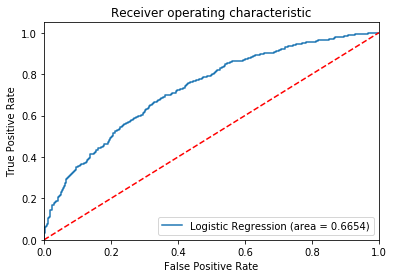

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [144]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [145]:
dataset=x.values
X0=dataset[:,0:11]
Y0=np.array(target)

In [523]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')
clf1 = KNeighborsClassifier(n_neighbors=100)
clf2 = RandomForestClassifier(random_state=123)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X0, Y0, 
                                              cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))


10-fold cross validation:

Accuracy: 0.61 (+/- 0.02) [KNN]
Accuracy: 0.60 (+/- 0.01) [Random Forest]
Accuracy: 0.54 (+/- 0.02) [Naive Bayes]
Accuracy: 0.60 (+/- 0.01) [StackingClassifier]


In [108]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [148]:
sclf.fit(x_train,y_train)
y_predst=sclf.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,y_predst)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,y_predst)
print('Precision: %f' %precision)
recall=recall_score(y_test,y_predst)
print('Recall :%f' %recall)
f1=f1_score(y_test,y_predst)
print('F1 Score :%f' %f1)

Accuracy: 0.730809
Precision: 0.763780
Recall :0.627155
F1 Score :0.688757


In [150]:
gini_normalized(y_test,y_predst)

0.4579636351414937

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [114]:

def gini(list_of_values):
    sorted_list = sorted(list(list_of_values))
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2
    return(fair_area - area) / fair_area

def normalized_gini(y_pred, y):
    normalized_gini = gini(y_pred)/gini(y)
    return normalized_gini
    

#predicted_y = np.random.randint(100, size = 1000)
#desired_y = np.random.randint(100, size = 1000)

print (normalized_gini(y_pred, y_test))

NameError: name 'y_pred' is not defined

In [152]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [153]:
gini_normalized(y_test,logy_pred)

0.32051925002190584

In [154]:
gini_normalized(y_test,logy_pred) #Logistic Regression

0.32051925002190584

In [155]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [440]:
xtest = pd.read_csv('x_test.csv')

In [441]:
encoder = ce.BinaryEncoder(cols=['ft_18_categ'])
xtest = encoder.fit_transform(xtest)
xtest

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,V,NOT,1,O,1,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,V,NOT,1,O,1,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,V,V,V,V,V,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,NOT,V,V,V,V,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,NOT,V,V,V,V,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,NOT,V,V,V,V,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,V,V,V,V,V,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [442]:
encoder = ce.BinaryEncoder(cols=['ft_10_categ'])
xtest = encoder.fit_transform(xtest)
xtest

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,V,NOT,1,O,1,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,V,NOT,1,O,1,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,V,V,V,V,V,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,NOT,V,V,V,V,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,NOT,V,V,V,V,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,NOT,V,V,V,V,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,V,V,V,V,V,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [443]:
encoder = ce.BinaryEncoder(cols=['ft_12_categ'])
xtest = encoder.fit_transform(xtest)
xtest

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,V,NOT,1,O,1,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,V,NOT,1,O,1,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,V,V,V,V,V,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,NOT,V,V,V,V,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,NOT,V,V,V,V,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,NOT,V,V,V,V,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,NOT,V,V,V,V,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,V,V,V,V,V,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [444]:
encoder = ce.BinaryEncoder(cols=['ft_5_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ', 'ft_7_categ',
       'ft_8_categ', 'ft_9_categ', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ', 'ft_12_categ_0', 'ft_12_categ_1',
       'ft_12_categ_2', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1',
       'ft_18_categ_2', 'ft_18_categ_3', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [445]:
encoder = ce.BinaryEncoder(cols=['ft_6_categ'])
xtest = encoder.fit_transform(xtest)
xtest

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,0,0,1,0,0,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,0,0,1,0,0,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,0,0,1,0,1,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,0,1,0,0,1,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,0,1,0,0,1,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,0,1,0,0,1,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,0,1,0,0,1,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,0,1,0,0,1,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,0,0,1,0,1,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [446]:
encoder = ce.BinaryEncoder(cols=['ft_8_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ', 'ft_8_categ_0', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ', 'ft_12_categ_0', 'ft_12_categ_1',
       'ft_12_categ_2', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1',
       'ft_18_categ_2', 'ft_18_categ_3', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [447]:
encoder = ce.BinaryEncoder(cols=['ft_7_categ'])
xtest = encoder.fit_transform(xtest)
xtest

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,0,0,1,0,0,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,0,0,1,0,0,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,0,0,1,0,1,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,0,1,0,0,1,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,0,1,0,0,1,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,0,1,0,0,1,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,0,1,0,0,1,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,0,1,0,0,1,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,0,0,1,0,1,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [448]:
encoder = ce.BinaryEncoder(cols=['ft_9_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ', 'ft_12_categ_0', 'ft_12_categ_1',
       'ft_12_categ_2', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1',
       'ft_18_categ_2', 'ft_18_categ_3', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [449]:
encoder = ce.BinaryEncoder(cols=['ft_11_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [257]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [450]:
encoder = ce.BinaryEncoder(cols=['ft_13_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1',
       'ft_18_categ_2', 'ft_18_categ_3', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [451]:
encoder = ce.BinaryEncoder(cols=['ft_14_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [452]:
encoder = ce.BinaryEncoder(cols=['ft_15_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_16_categ',
       'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [453]:
encoder = ce.BinaryEncoder(cols=['ft_16_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_17_categ', 'ft_18_categ_0', 'ft_18_categ_1',
       'ft_18_categ_2', 'ft_18_categ_3', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [454]:
encoder = ce.BinaryEncoder(cols=['ft_17_categ'])
xtest = encoder.fit_transform(xtest)
xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_17_categ_0', 'ft_17_categ_1', 'ft_17_categ_2',
       'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [225]:
#encoder = ce.BinaryEncoder(cols=['ft_19_categ'])
#xtest = encoder.fit_transform(xtest)
#xtest.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_17_categ_0', 'ft_17_categ_1', 'ft_17_categ_2',
       'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ_0', 'ft_19_categ_1', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [455]:
col1 = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1','ft_12_categ_1','ft_4_categ','ft_7_categ_2',
       'ft_18_categ_2','ft_18_categ_3']

cols = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1']


testData = xtest

testData

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,16872,2012,1.000000,1,0,0,1,0,0,...,0,0,1,2,2682.0,2,1970.0,0,4,78383
1,1,16852,2012,1.000000,1,0,0,1,0,0,...,0,1,0,2,2925.0,2,1960.0,0,6,78242
2,2,598,2014,1.000000,1,0,0,1,0,1,...,0,1,0,2,525.0,4,1960.0,0,0,75120
3,3,4516,2013,0.161644,0,0,1,0,0,1,...,0,1,0,2,443.0,2,1980.0,0,0,11901
4,4,7939,2013,1.000000,0,0,1,0,0,1,...,0,1,0,2,1070.0,1,NaN,0,0,42330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,0,1,0,0,1,...,0,1,0,2,300.0,3,1960.0,0,0,54395
3408,3408,12489,2012,0.314208,0,0,1,0,0,1,...,0,1,0,2,2500.0,1,1988.0,0,0,17028
3409,3409,12744,2013,0.084932,1,0,1,0,0,1,...,0,1,0,2,995.0,2,1960.0,0,0,95210
3410,3410,10632,2014,1.000000,0,0,0,1,0,1,...,0,1,0,2,5500.0,2,1980.0,0,0,80021


In [456]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [457]:
testData.columns

Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_17_categ_0', 'ft_17_categ_1', 'ft_17_categ_2',
       'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [458]:
testData = testData.drop(['ft_8_categ_0'], axis = 1)


In [459]:
testData = testData.drop(['ft_18_categ_0'], axis = 1)


In [460]:
testData = testData.drop(['login'], axis = 1)


In [461]:
testData = testData.drop(['Index'], axis = 1)


In [462]:
testData = testData.drop(['Insee'], axis = 1)


In [463]:
testData = testData.drop(['ft_9_categ_0'], axis = 1)


In [483]:
testData['Difference'] = testData['ft_2_categ'] - testData['ft_22_categ']

In [465]:
#testData['ft_24_categ'].describe()
#df_binary['ft_24_categ'].describe()
#df_binary['ft_24_categ'].value_counts()
testData['ft_24_categ'] = testData['ft_24_categ'].replace(to_replace = '>=10', value = 10)
testData['ft_24_categ'] = testData['ft_24_categ'].replace(to_replace = '> = 10', value = 10)
testData['ft_24_categ'].describe()


count     3412
unique      11
top          0
freq      1982
Name: ft_24_categ, dtype: object

In [466]:
#testData['ft_24_categ'] = testData['ft_24_categ'].
#testData = testData.convert_objects(convert_numeric=True)
testData = testData.apply(lambda col:pd.to_numeric(col, errors='coerce'))
testData['ft_24_categ'].describe()

count    3412.000000
mean        1.825909
std         2.454188
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        10.000000
Name: ft_24_categ, dtype: float64

In [467]:
testData.dtypes

ft_2_categ         int64
EXPO             float64
ft_4_categ         int64
ft_5_categ_0       int64
ft_5_categ_1       int64
ft_5_categ_2       int64
ft_6_categ_0       int64
ft_6_categ_1       int64
ft_6_categ_2       int64
ft_7_categ_0       int64
ft_7_categ_1       int64
ft_7_categ_2       int64
ft_8_categ_1       int64
ft_8_categ_2       int64
ft_9_categ_1       int64
ft_9_categ_2       int64
ft_10_categ_0      int64
ft_10_categ_1      int64
ft_10_categ_2      int64
ft_11_categ_0      int64
ft_11_categ_1      int64
ft_11_categ_2      int64
ft_12_categ_0      int64
ft_12_categ_1      int64
ft_12_categ_2      int64
ft_13_categ_0      int64
ft_13_categ_1      int64
ft_13_categ_2      int64
ft_14_categ_0      int64
ft_14_categ_1      int64
ft_14_categ_2      int64
ft_15_categ_0      int64
ft_15_categ_1      int64
ft_16_categ_0      int64
ft_16_categ_1      int64
ft_17_categ_0      int64
ft_17_categ_1      int64
ft_17_categ_2      int64
ft_18_categ_1      int64
ft_18_categ_2      int64


In [468]:
names = testData.columns# Create the Scaler object
#names = np.array(names)
#names = np.delete(names,52)
names

scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
test_df = scaler.fit_transform(testData)
test_df = pd.DataFrame(test_df, columns=names)
test_df.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1',
       'ft_16_categ_0', 'ft_16_categ_1', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [469]:
x.columns


Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [470]:
test_df = test_df.rename(columns = {'ft_16_categ_1':'ft_16_categ_2'})

In [471]:
test_df = test_df.rename(columns = {'ft_16_categ_0':'ft_16_categ_1'})

In [472]:
test_df = test_df.rename(columns = {'ft_15_categ_1':'ft_15_categ_2'})

In [473]:
test_df = test_df.rename(columns = {'ft_15_categ_0':'ft_15_categ_1'})

In [ ]:
#'ft_16_categ_0':'ft_16_categ_1','ft_15_categ_1':'ft_15_categ_2','ft_15_categ_0':'ft_15_categ_1'

In [474]:
test_df.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [475]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [484]:
nullData = test_df.isnull().sum()
nullData

ft_2_categ         0
EXPO               0
ft_4_categ         0
ft_5_categ_0       0
ft_5_categ_1       0
ft_5_categ_2       0
ft_6_categ_0       0
ft_6_categ_1       0
ft_6_categ_2       0
ft_7_categ_0       0
ft_7_categ_1       0
ft_7_categ_2       0
ft_8_categ_1       0
ft_8_categ_2       0
ft_9_categ_1       0
ft_9_categ_2       0
ft_10_categ_0      0
ft_10_categ_1      0
ft_10_categ_2      0
ft_11_categ_0      0
ft_11_categ_1      0
ft_11_categ_2      0
ft_12_categ_0      0
ft_12_categ_1      0
ft_12_categ_2      0
ft_13_categ_0      0
ft_13_categ_1      0
ft_13_categ_2      0
ft_14_categ_0      0
ft_14_categ_1      0
ft_14_categ_2      0
ft_15_categ_1      0
ft_15_categ_2      0
ft_16_categ_1      0
ft_16_categ_2      0
ft_17_categ_0      0
ft_17_categ_1      0
ft_17_categ_2      0
ft_18_categ_1      0
ft_18_categ_2      0
ft_18_categ_3      0
ft_19_categ        0
superficief        0
ft_21_categ        0
ft_22_categ        0
ft_23_categ        0
ft_24_categ        0
Difference   

In [486]:
nullData = test_df.isnull().sum()
nullData

ft_2_categ       0
EXPO             0
ft_4_categ       0
ft_5_categ_0     0
ft_5_categ_1     0
ft_5_categ_2     0
ft_6_categ_0     0
ft_6_categ_1     0
ft_6_categ_2     0
ft_7_categ_0     0
ft_7_categ_1     0
ft_7_categ_2     0
ft_8_categ_1     0
ft_8_categ_2     0
ft_9_categ_1     0
ft_9_categ_2     0
ft_10_categ_0    0
ft_10_categ_1    0
ft_10_categ_2    0
ft_11_categ_0    0
ft_11_categ_1    0
ft_11_categ_2    0
ft_12_categ_0    0
ft_12_categ_1    0
ft_12_categ_2    0
ft_13_categ_0    0
ft_13_categ_1    0
ft_13_categ_2    0
ft_14_categ_0    0
ft_14_categ_1    0
ft_14_categ_2    0
ft_15_categ_1    0
ft_15_categ_2    0
ft_16_categ_1    0
ft_16_categ_2    0
ft_17_categ_0    0
ft_17_categ_1    0
ft_17_categ_2    0
ft_18_categ_1    0
ft_18_categ_2    0
ft_18_categ_3    0
ft_19_categ      0
superficief      0
ft_21_categ      0
ft_22_categ      0
ft_23_categ      0
ft_24_categ      0
Difference       0
dtype: int64

In [477]:
test_df['superficief']=test_df['superficief'].interpolate(method='linear',limit_direction='forward')

In [479]:
test_df['ft_22_categ']=test_df['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [481]:
test_df['ft_23_categ']=test_df['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [485]:
test_df['Difference']=test_df['Difference'].interpolate(method='linear',limit_direction='forward')

In [205]:
y_tar=logreg.predict(test_df)

In [487]:
test_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference
0,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,-2.041984,2.948420,0.250855,0.405200,-0.254044,0.151952,-0.368936,0.886000,-0.197667
1,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.515265,-0.254044,-0.127020,-0.368936,1.701053,0.081155
2,0.280462,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.571800,1.783087,-0.127020,-0.368936,-0.744106,0.136919
3,-0.440122,-3.171171,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.608942,-0.254044,0.430924,-0.368936,-0.744106,-0.448607
4,-0.440122,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.324946,-1.272610,0.151952,-0.368936,-0.744106,-0.141903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,-1.160706,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.673713,0.764522,-0.127020,-0.368936,-0.744106,0.081155
3408,-1.160706,-2.525580,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.322764,-1.272610,0.654101,-0.368936,-0.744106,-0.699547
3409,-0.440122,-3.495787,1.643366,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.358917,-0.254044,-0.127020,-0.368936,-0.744106,0.109037
3410,0.280462,0.376426,-0.608507,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,1.681597,-0.254044,0.430924,-0.368936,-0.744106,-0.420725


In [ ]:
np.size(y_tar)

In [ ]:
test_login = xtest1['login']

In [ ]:
df=pd.DataFrame({'login':test_login})
df['TARGET']=y_tar
df

In [ ]:
df['TARGET'].value_counts()

In [ ]:
xtest1['TARGET']=y_tar

In [ ]:
xtest1

In [ ]:
#export_csv=xtest1.to_csv(r'/home/prajj/Documents/5th Sem/DMA/y_testn.csv',index=True,header=True)

In [ ]:
#export_csv=df.to_csv(r'/home/prajj/Documents/5th Sem/DMA/letsCy_testn.csv',index=True,header=True)

In [ ]:
#realTest = pd.read_csv('X_test.csv')
#realTest['target'] = y_tar
#realTest
#export_csv=realTest.to_csv(r'/home/prajj/Documents/5th Sem/DMA/YTest.csv',index=True,header=True)

In [156]:
dataset=x.values
X0=dataset[:,0:11]
Y0=np.array(target)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf1= StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [5, 10],
          'randomforestclassifier__n_estimators': [10, 55],
          'meta_classifier__C': [0.2, 10.0]}

grid = GridSearchCV(estimator=sclf1, 
                    param_grid=params, 
                    cv=10,
                    refit=True)
grid.fit(X0, Y0)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.600 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.2, 'randomforestclassifier__n_estimators': 10}
0.598 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.2, 'randomforestclassifier__n_estimators': 55}
0.600 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.598 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 55}
0.600 +/- 0.01 {'kneighborsclassifier__n_neighbors': 10, 'meta_classifier__C': 0.2, 'randomforestclassifier__n_estimators': 10}
0.598 +/- 0.01 {'kneighborsclassifier__n_neighbors': 10, 'meta_classifier__C': 0.2, 'randomforestclassifier__n_estimators': 55}
0.600 +/- 0.01 {'kneighborsclassifier__n_neighbors': 10, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.598 +/- 0.01 {'kneighborsclassifier__n_neighbors': 10, 'meta_classifier__C': 10.0, 'randomforestclassif

In [362]:
#from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0) # 70% training and 30% test


In [363]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0) # 70% training and 30% test

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
nby_pred = gnb.predict(X_test)

In [365]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,nby_pred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,nby_pred)
print('Precision: %f' %precision)
recall=recall_score(y_test,nby_pred)
print('Recall :%f' %recall)
f1=f1_score(y_test,nby_pred)
print('F1 Score :%f' %f1)

Accuracy: 0.593452
Precision: 0.575246
Recall :0.581792
F1 Score :0.578501


In [159]:
y_pred = gnb.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(gnb.score(X_test, nby_pred)))

Accuracy of logistic regression classifier on test set: 1.000000


In [330]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, nby_pred)
confusion_matrix

array([[461, 302],
       [294, 409]])

In [331]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nby_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       763
           1       0.58      0.58      0.58       703

    accuracy                           0.59      1466
   macro avg       0.59      0.59      0.59      1466
weighted avg       0.59      0.59      0.59      1466



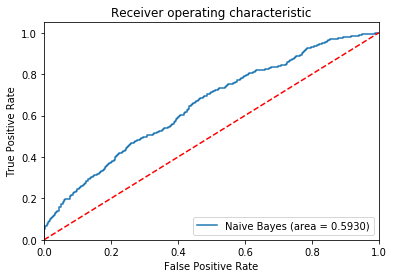

In [162]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [373]:
gini_normalized(y_test,nby_pred)

0.05939673531291389

1466

In [195]:
realTest['target'] = y_tar
realTest

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,16872,2012,1,1,V,N,1,O,1,...,V,effpi,2,2682.0,2,1970.0,0.0,4,78383,0
1,1,16852,2012,1,1,V,N,1,O,1,...,V,base,2,2925.0,2,1960.0,0.0,6,78242,0
2,2,598,2014,1,1,V,V,V,V,V,...,N,base,2,525.0,4,1960.0,0.0,.,75120,1
3,3,4516,2013,"0,161643836",0,N,V,V,V,V,...,N,base,2,443.0,2,1980.0,0.0,.,11901,0
4,4,7939,2013,1,0,N,V,V,V,V,...,N,base,2,1070.0,1,NaN,0.0,.,42330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1,0,N,V,V,V,V,...,N,base,2,300.0,3,1960.0,0.0,.,54395,0
3408,3408,12489,2012,"0,31420765",0,N,V,V,V,V,...,N,base,2,2500.0,1,1988.0,0.0,.,17028,0
3409,3409,12744,2013,"0,084931507",1,N,V,V,V,V,...,N,base,2,995.0,2,1960.0,0.0,.,95210,0
3410,3410,10632,2014,1,0,V,V,V,V,V,...,N,base,2,5500.0,2,1980.0,0.0,.,80021,1


In [196]:
test_login2 = xtest1['login']

In [197]:
export_csv=realTest.to_csv(r'/home/prajj/Documents/5th Sem/DMA/YTest2.csv',index=True,header=True)

In [212]:
y_pred = gnb.predict(test_df)

In [218]:
np.size(y_pred)

1466

In [259]:

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [374]:
gini_normalized(y_test,y_pred)

0.05939673531291389

In [261]:
X_test

,superficief,EXPO,ft_21_categ,ft_24_categ,ft_18_categ_1,ft_10_categ_1,ft_12_categ_1,ft_4_categ,ft_7_categ_2,ft_18_categ_2,ft_18_categ_3
307,1.680155,0.325953,-1.312425,2.864692,-1.579328,-0.878918,0.951434,-0.682705,0.979935,-1.712651,1.610762
1345,-0.813675,0.325953,0.676776,-0.962994,0.633181,1.137763,0.951434,-0.682705,-1.020476,0.583890,-0.620824
2708,0.061740,0.325953,1.671377,0.185312,0.633181,-0.878918,-1.051045,-0.682705,0.979935,0.583890,-0.620824
970,-0.568706,-2.370894,-0.317824,-0.197457,0.633181,-0.878918,-1.051045,1.464761,0.979935,0.583890,-0.620824
2610,-0.019181,0.325953,1.671377,0.568080,0.633181,-0.878918,0.951434,-0.682705,0.979935,0.583890,-0.620824
...,...,...,...,...,...,...,...,...,...,...,...
4292,-0.177344,0.325953,-1.312425,-0.962994,0.633181,1.137763,0.951434,-0.682705,-1.020476,0.583890,-0.620824
4073,1.151964,0.325953,0.676776,0.950849,0.633181,-0.878918,-1.051045,-0.682705,0.979935,0.583890,-0.620824
191,-0.545166,0.325953,-1.312425,-0.962994,-1.579328,1.137763,0.951434,1.464761,-1.020476,-1.712651,1.610762
1298,-0.395830,0.325953,-0.317824,0.185312,-1.579328,-0.878918,-1.051045,-0.682705,0.979935,0.583890,1.610762


In [382]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=250) # 70% training and 30% test

from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [383]:
knnpred = knnmodel.predict(X_test)

In [384]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(knnmodel.score(X_test, knnpred)))
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,knnpred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,knnpred)
print('Precision: %f' %precision)
recall=recall_score(y_test,knnpred)
print('Recall :%f' %recall)
f1=f1_score(y_test,knnpred)
print('F1 Score :%f' %f1)

Accuracy: 0.645975
Precision: 0.618105
Recall :0.637026
F1 Score :0.627423


In [385]:
gini_normalized(y_test,knnpred)

0.3021379980563654

In [386]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knnpred)
confusion_matrix

array([[510, 270],
       [249, 437]])

In [387]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       780
           1       0.62      0.64      0.63       686

    accuracy                           0.65      1466
   macro avg       0.65      0.65      0.65      1466
weighted avg       0.65      0.65      0.65      1466



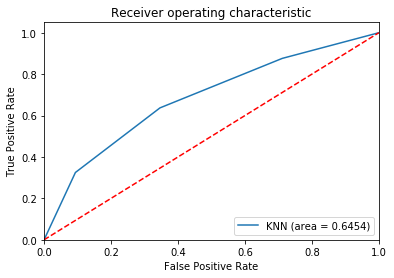

In [388]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knnmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knnmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [504]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3,random_state=415) # 70% training and 30% test

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
randomclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
randomclf.fit(X_train2,y_train2)

y_random=randomclf.predict(X_test2)

In [505]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(randomclf.score(X_test, y_random)))
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test2,y_random)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test2,y_random)
print('Precision: %f' %precision)
recall=recall_score(y_test2,y_random)
print('Recall :%f' %recall)
f1=f1_score(y_test2,y_random)
print('F1 Score :%f' %f1)

Accuracy: 0.749659
Precision: 0.751962
Recall :0.696221
F1 Score :0.723019


In [506]:
gini_normalized(y_test2,y_random)

0.5003624379745322

In [507]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_random)
confusion_matrix

array([[620, 158],
       [209, 479]])

In [425]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_random))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       785
           1       0.78      0.67      0.72       681

    accuracy                           0.76      1466
   macro avg       0.76      0.75      0.76      1466
weighted avg       0.76      0.76      0.76      1466



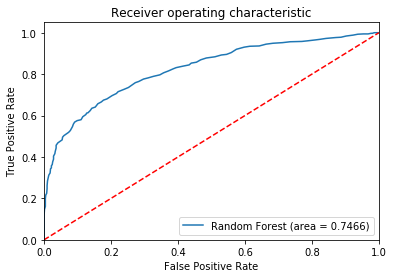

In [508]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, randomclf.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, randomclf.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [431]:
test_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference
0,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,-2.041984,2.948420,0.250855,0.405200,-0.254044,0.151952,-0.368936,0.886000,-0.197667
1,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.515265,-0.254044,-0.127020,-0.368936,1.701053,0.081155
2,0.280462,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.571800,1.783087,-0.127020,-0.368936,-0.744106,0.136919
3,-0.440122,-3.171171,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.608942,-0.254044,0.430924,-0.368936,-0.744106,-0.448607
4,-0.440122,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.324946,-1.272610,NaN,-0.368936,-0.744106,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,-1.160706,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.673713,0.764522,-0.127020,-0.368936,-0.744106,0.081155
3408,-1.160706,-2.525580,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.322764,-1.272610,0.654101,-0.368936,-0.744106,-0.699547
3409,-0.440122,-3.495787,1.643366,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.358917,-0.254044,-0.127020,-0.368936,-0.744106,0.109037
3410,0.280462,0.376426,-0.608507,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,1.681597,-0.254044,0.430924,-0.368936,-0.744106,-0.420725


In [491]:
randomY = randomclf.predict(test_df)

In [492]:
randomY

array([1, 1, 0, ..., 0, 1, 0])

In [496]:
realTest2 = pd.read_csv('X_test.csv')

In [499]:
realTest2['target'] = randomY
realTest2

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,16872,2012,1,1,V,N,1,O,1,...,V,effpi,2,2682.0,2,1970.0,0.0,4,78383,1
1,1,16852,2012,1,1,V,N,1,O,1,...,V,base,2,2925.0,2,1960.0,0.0,6,78242,1
2,2,598,2014,1,1,V,V,V,V,V,...,N,base,2,525.0,4,1960.0,0.0,.,75120,0
3,3,4516,2013,"0,161643836",0,N,V,V,V,V,...,N,base,2,443.0,2,1980.0,0.0,.,11901,0
4,4,7939,2013,1,0,N,V,V,V,V,...,N,base,2,1070.0,1,NaN,0.0,.,42330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1,0,N,V,V,V,V,...,N,base,2,300.0,3,1960.0,0.0,.,54395,0
3408,3408,12489,2012,"0,31420765",0,N,V,V,V,V,...,N,base,2,2500.0,1,1988.0,0.0,.,17028,1
3409,3409,12744,2013,"0,084931507",1,N,V,V,V,V,...,N,base,2,995.0,2,1960.0,0.0,.,95210,0
3410,3410,10632,2014,1,0,V,V,V,V,V,...,N,base,2,5500.0,2,1980.0,0.0,.,80021,1


In [500]:
export_csv=realTest2.to_csv(r'/home/prajj/Documents/5th Sem/DMA/randomYTest2.csv',index=False,header=True)

In [515]:
from sklearn import svm
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3,random_state=10) # 70% training and 30% test

#Create a svm Classifier
svmclf = svm.SVC(kernel='linear',probability = True) # Linear Kernel

#Train the model using the training sets
svmclf.fit(X_train3, y_train3)

#Predict the response for test dataset
svmy_pred = svmclf.predict(X_test3)

In [516]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(randomclf.score(X_test, y_random)))
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test3,svmy_pred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test3,svmy_pred)
print('Precision: %f' %precision)
recall=recall_score(y_test3,svmy_pred)
print('Recall :%f' %recall)
f1=f1_score(y_test3,svmy_pred)
print('F1 Score :%f' %f1)

Accuracy: 0.667804
Precision: 0.627141
Recall :0.700000
F1 Score :0.661571


In [178]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(randomclf.score(X_test, svmy_pred)))

Accuracy of logistic regression classifier on test set: 0.714870


In [512]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, svmy_pred)
confusion_matrix

array([[368, 407],
       [341, 350]])

In [514]:
gini_normalized(y_test3,svmy_pred)

0.29399511470748796

In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svmy_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       786
           1       0.63      0.70      0.66       680

    accuracy                           0.67      1466
   macro avg       0.67      0.67      0.67      1466
weighted avg       0.67      0.67      0.67      1466



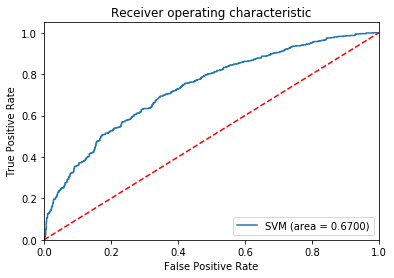

In [369]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, svmclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svmclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [183]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlpclassifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

mlpclassifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [184]:
mlppred = mlpclassifier.predict(X_test)

In [185]:
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(mlpclassifier.score(X_test, mlppred)))

Accuracy of logistic regression classifier on test set: 1.000000


In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, svmy_pred)
confusion_matrix

array([[477, 286],
       [225, 478]])

In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlppred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       763
           1       0.65      0.66      0.66       703

    accuracy                           0.67      1466
   macro avg       0.67      0.67      0.67      1466
weighted avg       0.67      0.67      0.67      1466



In [188]:
gini_normalized(y_test,mlppred)

0.31904643831249346

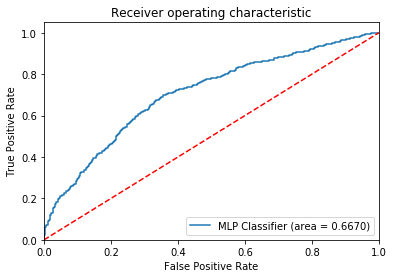

In [189]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, mlpclassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlpclassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP Classifier (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [350]:
x

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference
0,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.360887,1.671377,1.055033,-0.432144,-0.197457,-1.045728
1,0.230251,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.132470,-0.317824,0.292157,-0.432144,-0.962994,-0.284095
2,-0.492148,0.325953,1.464761,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.258265,1.671377,0.228584,-0.432144,-0.962994,-0.244426
3,-0.492148,-3.704661,-0.682705,-0.49872,4.519451,-1.770967,-0.014309,0.339929,-1.140134,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.662133,0.676776,0.165011,-0.432144,-0.962994,-0.180957
4,0.952650,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,-2.941794,0.877090,-0.231264,...,-1.579328,-1.712651,1.610762,0.27221,-0.471601,-0.317824,0.101438,-0.432144,0.568080,-0.069885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-0.492148,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,4.324070,...,0.633181,0.583890,-0.620824,0.27221,-0.056698,-1.312425,-0.184641,-0.432144,0.568080,0.168125
4881,-1.214548,0.325953,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,-1.579328,0.583890,1.610762,0.27221,-0.627926,1.671377,0.006078,2.106162,0.185312,-0.046084
4882,1.675049,0.311336,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,0.877090,-0.231264,...,0.633181,-1.712651,-0.620824,0.27221,0.031211,-1.312425,0.602075,-0.432144,0.568080,-0.545906
4883,0.952650,-3.704661,-0.682705,-0.49872,-0.221266,0.564663,-0.014309,0.339929,-1.140134,-0.231264,...,0.633181,0.583890,-0.620824,0.27221,-0.581948,1.671377,0.327917,-0.432144,-0.962994,-0.295995


In [357]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3,random_state=5) # 70% training and 30% test


xgboostmodel = XGBClassifier()

#X_train.drop_duplicates()
#X_train.columns
#X_train = X_train.loc[:,~X_train.columns.duplicated()]

xgboostmodel.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [272]:
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [358]:
xgboostpred = xgboostmodel.predict(X_test1)

In [339]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(xgboostmodel.score(X_test, xgboostpred)))

In [359]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,xgboostpred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,xgboostpred)
print('Precision: %f' %precision)
recall=recall_score(y_test,xgboostpred)
print('Recall :%f' %recall)
f1=f1_score(y_test,xgboostpred)
print('F1 Score :%f' %f1)

Accuracy: 0.478172
Precision: 0.446367
Recall :0.366999
F1 Score :0.402810


In [315]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, xgboostpred)
confusion_matrix

array([[684,  79],
       [182, 521]])

In [337]:
gini_normalized(y_test,xgboostpred)

0.6155775006571724

In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgboostpred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       763
           1       0.87      0.74      0.80       703

    accuracy                           0.82      1466
   macro avg       0.83      0.82      0.82      1466
weighted avg       0.83      0.82      0.82      1466



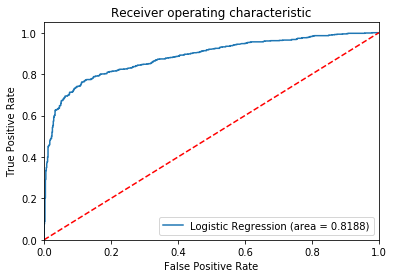

In [318]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgboostmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgboostmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [319]:
xgboostpred

array([0, 0, 0, ..., 0, 1, 1])

In [320]:
test_df = test_df.loc[:,~test_df.columns.duplicated()]
test_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_1,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference
0,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,-2.041984,2.948420,0.250855,0.405200,-0.254044,0.151952,-0.368936,0.886000,-0.197667
1,-1.160706,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,-1.178000,1.177291,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.515265,-0.254044,-0.127020,-0.368936,1.701053,0.081155
2,0.280462,0.376426,1.643366,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.571800,1.783087,-0.127020,-0.368936,-0.744106,0.136919
3,-0.440122,-3.171171,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.608942,-0.254044,0.430924,-0.368936,-0.744106,-0.448607
4,-0.440122,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.324946,-1.272610,NaN,-0.368936,-0.744106,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,-1.160706,0.376426,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.673713,0.764522,-0.127020,-0.368936,-0.744106,0.081155
3408,-1.160706,-2.525580,-0.608507,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,0.322764,-1.272610,0.654101,-0.368936,-0.744106,-0.699547
3409,-0.440122,-3.495787,1.643366,0.0,1.432438,-1.442020,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,-0.358917,-0.254044,-0.127020,-0.368936,-0.744106,0.109037
3410,0.280462,0.376426,-0.608507,0.0,-0.698111,0.693472,0.0,0.848897,-0.849408,-0.176429,...,-0.368536,0.489720,-0.339165,0.250855,1.681597,-0.254044,0.430924,-0.368936,-0.744106,-0.420725


In [321]:
xgPred = xgboostmodel.predict(test_df)

In [322]:
xgPred

array([0, 1, 0, ..., 0, 1, 0])

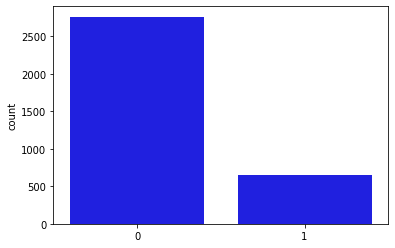

In [340]:
sns.countplot(x=xgPred,data=scaled_df,color="b")

In [389]:
xtest1['TARGET'] = xgPred
xtest1

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,0,16872,2012,1.000000,1,V,NOT,1,O,1,...,V,effpi,2,2682.0,2,1970.0,0,4,78383,0
1,1,16852,2012,1.000000,1,V,NOT,1,O,1,...,V,based,2,2925.0,2,1960.0,0,6,78242,1
2,2,598,2014,1.000000,1,V,V,V,V,V,...,NOT,based,2,525.0,4,1960.0,0,0,75120,0
3,3,4516,2013,0.161644,0,NOT,V,V,V,V,...,NOT,based,2,443.0,2,1980.0,0,0,11901,0
4,4,7939,2013,1.000000,0,NOT,V,V,V,V,...,NOT,based,2,1070.0,1,NaN,0,0,42330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1.000000,0,NOT,V,V,V,V,...,NOT,based,2,300.0,3,1960.0,0,0,54395,0
3408,3408,12489,2012,0.314208,0,NOT,V,V,V,V,...,NOT,based,2,2500.0,1,1988.0,0,0,17028,1
3409,3409,12744,2013,0.084932,1,NOT,V,V,V,V,...,NOT,based,2,995.0,2,1960.0,0,0,95210,0
3410,3410,10632,2014,1.000000,0,V,V,V,V,V,...,NOT,based,2,5500.0,2,1980.0,0,0,80021,1


In [323]:
realTest = pd.read_csv('X_test.csv')
realTest['target'] = xgPred
realTest


,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,16872,2012,1,1,V,N,1,O,1,...,V,effpi,2,2682.0,2,1970.0,0.0,4,78383,0
1,1,16852,2012,1,1,V,N,1,O,1,...,V,base,2,2925.0,2,1960.0,0.0,6,78242,1
2,2,598,2014,1,1,V,V,V,V,V,...,N,base,2,525.0,4,1960.0,0.0,.,75120,0
3,3,4516,2013,"0,161643836",0,N,V,V,V,V,...,N,base,2,443.0,2,1980.0,0.0,.,11901,0
4,4,7939,2013,1,0,N,V,V,V,V,...,N,base,2,1070.0,1,NaN,0.0,.,42330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3407,10969,2012,1,0,N,V,V,V,V,...,N,base,2,300.0,3,1960.0,0.0,.,54395,0
3408,3408,12489,2012,"0,31420765",0,N,V,V,V,V,...,N,base,2,2500.0,1,1988.0,0.0,.,17028,0
3409,3409,12744,2013,"0,084931507",1,N,V,V,V,V,...,N,base,2,995.0,2,1960.0,0.0,.,95210,0
3410,3410,10632,2014,1,0,V,V,V,V,V,...,N,base,2,5500.0,2,1980.0,0.0,.,80021,1


In [324]:
export_csv=realTest.to_csv(r'/home/prajj/Documents/5th Sem/DMA/XGYTest_3.csv',index=True,header=True)

In [390]:
export_csv=xtest1.to_csv(r'/home/prajj/Documents/5th Sem/DMA/xgBy_test.csv',index=True,header=True)

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
xg = XGBClassifier()
log = LogisticRegression()
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, x, y, cv=10, n_jobs=-1)
    
    print( "Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]" .format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n" .format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))
    

Mean of: 0.745, std: (+/-) 0.022 [RandomForestClassifier]
Mean of: 0.719, std: (+/-) 0.021 [Bagging RandomForestClassifier]

Mean of: 0.708, std: (+/-) 0.018 [ExtraTreesClassifier]
Mean of: 0.706, std: (+/-) 0.025 [Bagging ExtraTreesClassifier]

Mean of: 0.663, std: (+/-) 0.013 [KNeighborsClassifier]
Mean of: 0.717, std: (+/-) 0.018 [Bagging KNeighborsClassifier]



TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [199]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression

In [200]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [201]:
gradbpred = clf.predict(X_test)

In [341]:
#print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(clf.score(X_test, gradbpred)))

In [343]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(y_test,gradbpred)
print('Accuracy: %f' %accuracy)
precision=precision_score(y_test,gradbpred)
print('Precision: %f' %precision)
recall=recall_score(y_test,gradbpred)
print('Recall :%f' %recall)
f1=f1_score(y_test,gradbpred)
print('F1 Score :%f' %f1)

Accuracy: 0.816508
Precision: 0.855738
Recall :0.742532
F1 Score :0.795126


In [344]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, gradbpred)
confusion_matrix

array([[675,  88],
       [181, 522]])

In [345]:
gini_normalized(y_test,gradbpred)

0.61368708157699

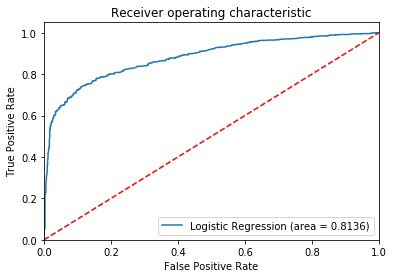

In [346]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [522]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.3,random_state=10)

from itertools import combinations
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
names = ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier']
def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([map(list, combinations(arg, i))for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])


stacked_clf_list = zip_stacked_classifiers(clf_array, names)
clf_array = list(clf_array)
names = list(names)
best_combination = [0.00, ""]
for clf in stacked_clf_list: 
    ensemble = SuperLearner(scorer = accuracy_score, random_state = seed, folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(lr)
    ensemble.fit(X_train4, y_train4)
    preds = ensemble.predict(X_test4)
    accuracy = accuracy_score(preds, y_test4)   
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}").format(accuracy, clf[1])
    print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])# Output


TypeError: can only concatenate list (not "map") to list